In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))  # or the full path to the "project" directory
import numpy as np
import gpbr

In [2]:
from gpbr.direct.common.boundary import Point2D
from gpbr.direct.common.distance import point_distance
def u2de(xp, t):
    point = Point2D(0,4)
    dist =point_distance(point, xp)
    return 1/4/np.pi/t*np.exp(-dist**2/4/t)
    

In [3]:
T = 1 # final time
N = 10 # N+1=10 time points
# M = 64 # number of collocation points
# M = 16 # number of collocation points
M = 16 # number of collocation points

In [4]:
from gpbr.direct.common.collocation import collocation_points_2d, CollocationData2D
coll_2d = collocation_points_2d(M, startpoint=False)
coll_2d

CollocationData2D(n=16, theta=array([0.39269908, 0.78539816, 1.17809725, 1.57079633, 1.96349541,
       2.35619449, 2.74889357, 3.14159265, 3.53429174, 3.92699082,
       4.3196899 , 4.71238898, 5.10508806, 5.49778714, 5.89048623,
       6.28318531]))

In [5]:
from gpbr.direct.common.boundary import StarlikeCurve, starlike_circle_base, starlike_curve
point_circle = starlike_circle_base(coll_2d)

Gamma1 = point_circle*0.8
Gamma2 = point_circle*1.6

In [6]:
Gamma1

StarlikeCurve(collocation=CollocationData2D(n=16, theta=array([0.39269908, 0.78539816, 1.17809725, 1.57079633, 1.96349541,
       2.35619449, 2.74889357, 3.14159265, 3.53429174, 3.92699082,
       4.3196899 , 4.71238898, 5.10508806, 5.49778714, 5.89048623,
       6.28318531])), points=[Point2D(x=np.float64(0.7391036260090293), y=np.float64(0.30614674589207214)), Point2D(x=np.float64(0.5656854249492381), y=np.float64(0.565685424949238)), Point2D(x=np.float64(0.3061467458920722), y=np.float64(0.7391036260090293)), Point2D(x=np.float64(4.898587196589413e-17), y=np.float64(0.8)), Point2D(x=np.float64(-0.30614674589207214), y=np.float64(0.7391036260090293)), Point2D(x=np.float64(-0.565685424949238), y=np.float64(0.5656854249492381)), Point2D(x=np.float64(-0.7391036260090295), y=np.float64(0.3061467458920719)), Point2D(x=np.float64(-0.8), y=np.float64(9.797174393178826e-17)), Point2D(x=np.float64(-0.7391036260090296), y=np.float64(-0.30614674589207175)), Point2D(x=np.float64(-0.5656854249492

In [7]:
Gamma2

StarlikeCurve(collocation=CollocationData2D(n=16, theta=array([0.39269908, 0.78539816, 1.17809725, 1.57079633, 1.96349541,
       2.35619449, 2.74889357, 3.14159265, 3.53429174, 3.92699082,
       4.3196899 , 4.71238898, 5.10508806, 5.49778714, 5.89048623,
       6.28318531])), points=[Point2D(x=np.float64(1.4782072520180587), y=np.float64(0.6122934917841443)), Point2D(x=np.float64(1.1313708498984762), y=np.float64(1.131370849898476)), Point2D(x=np.float64(0.6122934917841444), y=np.float64(1.4782072520180587)), Point2D(x=np.float64(9.797174393178826e-17), y=np.float64(1.6)), Point2D(x=np.float64(-0.6122934917841443), y=np.float64(1.4782072520180587)), Point2D(x=np.float64(-1.131370849898476), y=np.float64(1.1313708498984762)), Point2D(x=np.float64(-1.478207252018059), y=np.float64(0.6122934917841438)), Point2D(x=np.float64(-1.6), y=np.float64(1.9594348786357652e-16)), Point2D(x=np.float64(-1.4782072520180591), y=np.float64(-0.6122934917841435)), Point2D(x=np.float64(-1.1313708498984762

In [8]:
from gpbr.direct.common.boundary import Point2D
test_points = [Point2D(0.0, 0.98), Point2D(1.0, -0.73), Point2D(0.51, 0.54), Point2D(-0.501, 0.52), Point2D(-1.11, -0.75), Point2D(0.0, -1.0)]

In [9]:
import matplotlib.pyplot as plt

def plot_boundaries_and_points(G1: StarlikeCurve, G2: StarlikeCurve, test_points, t):
    fig_plot, ax_plot = plt.subplots()
    g1_x, g1_y = G1.raw_points()
    g2_x, g2_y = G2.raw_points()
    ax_plot.plot(g1_x, g1_y, 'b--')
    ax_plot.plot(g2_x, g2_y, 'r--')
    for i, p in enumerate(test_points):
        ax_plot.plot(p.x, p.y, 'go')
        ax_plot.annotate(f'ue_i={u2de(p,t)}', (p.x, p.y), textcoords="offset points", xytext=(15,-5), ha='center')

    ax_plot.axis('equal')
    plt.grid()
    plt.show()
    plt.close()

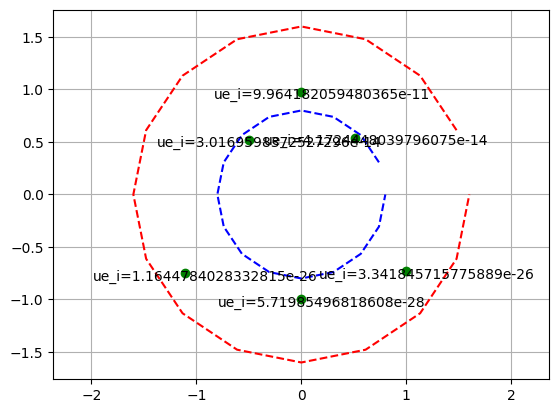

In [10]:
plot_boundaries_and_points(Gamma1, Gamma2, test_points,0.1)

# Approximation

In [11]:
tn = np.array([(n+1)*(T/(N+1)) for n in range(0, N+1)])
h = T/(N+1)

In [12]:
h

0.09090909090909091

In [13]:
nu = np.sqrt(2/h)
nu

np.float64(4.69041575982343)

In [14]:
betta_array = []
for n in range(0, N+1):
    sign = (-1)**n
    betta_array.append(sign*(4/h))
betta_array[0] = np.nan
betta_array

[nan, -44.0, 44.0, -44.0, 44.0, -44.0, 44.0, -44.0, 44.0, -44.0, 44.0]

In [15]:
from gpbr.direct.heat_equation.common import MFSData
mfs_data =MFSData(N, T, tn, M, betta_array, nu)

In [16]:
from gpbr.direct.common.source import SourcePoints2D, source_points_2d
source_coll_2d = collocation_points_2d(M//2, startpoint=False)
source_point_circle = starlike_circle_base(source_coll_2d)
eta1 = 0.5
eta2 = 2.0


Gamma1_source = source_point_circle*0.8
Gamma2_source = source_point_circle*1.6

source_points = source_points_2d(eta1, eta2, Gamma1_source, Gamma2_source)

In [17]:
source_points

SourcePoints2D(M=16, eta1=0.5, eta2=2.0, gart1=StarlikeCurve(collocation=CollocationData2D(n=8, theta=array([0.78539816, 1.57079633, 2.35619449, 3.14159265, 3.92699082,
       4.71238898, 5.49778714, 6.28318531])), points=[Point2D(x=np.float64(0.28284271247461906), y=np.float64(0.282842712474619)), Point2D(x=np.float64(2.4492935982947065e-17), y=np.float64(0.4)), Point2D(x=np.float64(-0.282842712474619), y=np.float64(0.28284271247461906)), Point2D(x=np.float64(-0.4), y=np.float64(4.898587196589413e-17)), Point2D(x=np.float64(-0.28284271247461906), y=np.float64(-0.282842712474619)), Point2D(x=np.float64(-7.347880794884119e-17), y=np.float64(-0.4)), Point2D(x=np.float64(0.28284271247461895), y=np.float64(-0.28284271247461906)), Point2D(x=np.float64(0.4), y=np.float64(-9.797174393178826e-17))]), gart2=StarlikeCurve(collocation=CollocationData2D(n=8, theta=array([0.78539816, 1.57079633, 2.35619449, 3.14159265, 3.92699082,
       4.71238898, 5.49778714, 6.28318531])), points=[Point2D(x=np.f

In [18]:
for i in range(0, 2*len(source_points.gart1.points)):
    print(f'source_points[{i}] = {source_points[i]}')

source_points[0] = Point2D(x=np.float64(2.2627416997969525), y=np.float64(2.262741699796952))
source_points[1] = Point2D(x=np.float64(1.9594348786357652e-16), y=np.float64(3.2))
source_points[2] = Point2D(x=np.float64(-2.262741699796952), y=np.float64(2.2627416997969525))
source_points[3] = Point2D(x=np.float64(-3.2), y=np.float64(3.9188697572715305e-16))
source_points[4] = Point2D(x=np.float64(-2.2627416997969525), y=np.float64(-2.262741699796952))
source_points[5] = Point2D(x=np.float64(-5.878304635907295e-16), y=np.float64(-3.2))
source_points[6] = Point2D(x=np.float64(2.2627416997969516), y=np.float64(-2.2627416997969525))
source_points[7] = Point2D(x=np.float64(3.2), y=np.float64(-7.837739514543061e-16))
source_points[8] = Point2D(x=np.float64(0.28284271247461906), y=np.float64(0.282842712474619))
source_points[9] = Point2D(x=np.float64(2.4492935982947065e-17), y=np.float64(0.4))
source_points[10] = Point2D(x=np.float64(-0.282842712474619), y=np.float64(0.28284271247461906))
sourc

In [19]:
## Plot
import matplotlib.pyplot as plt
def plot_2d(G1: StarlikeCurve, G2: StarlikeCurve, source):
    fig_plot, ax_plot = plt.subplots()
    g1_x, g1_y = G1.raw_points()
    g2_x, g2_y = G2.raw_points()
    ax_plot.plot(g1_x, g1_y, 'b--')
    ax_plot.plot(g2_x, g2_y, 'r--')

    for i in range(0,8):
        sp = source[i]
        ax_plot.plot(sp.x, sp.y, 'bo')

    

    ax_plot.axis('equal')
    plt.grid()
    plt.show()
    plt.close()
# ## Plot
# import matplotlib.pyplot as plt
# def plot_2d(G1: StarlikeCurve, G2: StarlikeCurve, artG1: StarlikeCurve, artG2: StarlikeCurve):
#     fig_plot, ax_plot = plt.subplots()
#     g1_x, g1_y = G1.raw_points()
#     g2_x, g2_y = G2.raw_points()
#     art1_x, art1_y = artG1.raw_points()
#     art2_x, art2_y = artG2.raw_points()
#     ax_plot.plot(g1_x, g1_y, 'b--')
#     ax_plot.plot(g2_x, g2_y, 'r--')
#     ax_plot.plot(art1_x, art1_y, 'bo')
#     ax_plot.plot(art2_x, art2_y, 'ro')


#     ax_plot.axis('equal')
#     plt.grid()
#     plt.show()
#     plt.close()


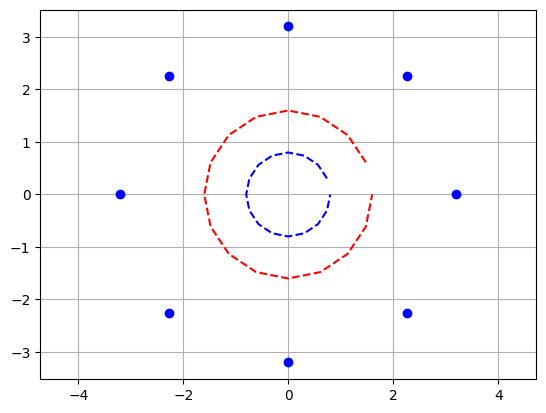

In [20]:
plot_2d(Gamma1, Gamma2, source_points)

In [21]:
# F_precalc = np.empty((2*M, N+1), dtype=np.float64)
F_precalc = np.ndarray(shape=(2*M, N+1), dtype=np.float64)
for n in range(0, N+1):
    for i in range(0, M):
        F_precalc[i][n] = u2de(Gamma1[i], tn[n])
    for i in range(0, M):
        F_precalc[M+i][n] = u2de(Gamma2[i], tn[n])

In [22]:
F_precalc.shape

(32, 11)

In [23]:
F_precalc[:,10]

array([2.29108275e-03, 3.85011063e-03, 5.44630983e-03, 6.15171578e-03,
       5.44630983e-03, 3.85011063e-03, 2.29108275e-03, 1.24201000e-03,
       6.73301228e-04, 4.00660911e-04, 2.83235600e-04, 2.50757494e-04,
       2.83235600e-04, 4.00660911e-04, 6.73301228e-04, 1.24201000e-03,
       2.61514100e-03, 7.38516111e-03, 1.47780879e-02, 1.88541120e-02,
       1.47780879e-02, 7.38516111e-03, 2.61514100e-03, 7.68535158e-04,
       2.25856384e-04, 7.99774413e-05, 3.99677072e-05, 3.13271869e-05,
       3.99677072e-05, 7.99774413e-05, 2.25856384e-04, 7.68535158e-04])

In [24]:
from gpbr.direct.heat_equation.polynomial import MFSPolinomials2D, calculate_2d_polinomials

mfs_polynomyals = calculate_2d_polinomials(mfs_data, N)

In [25]:
from gpbr.direct.heat_equation.fundamental_sequence import fundamental_sequence_2d, FundamentalSequence

fundamental_sequence_gamma1 = fundamental_sequence_2d(Gamma1, source_points, mfs_data, mfs_polynomyals)
fundamental_sequence_gamma2 = fundamental_sequence_2d(Gamma2, source_points, mfs_data, mfs_polynomyals)

In [26]:
concat = np.concat((fundamental_sequence_gamma1.phis[0],fundamental_sequence_gamma2.phis[0]))
for el in concat:
    print(el)

[3.23010230e-06 2.73551713e-07 1.52446781e-08 2.58827313e-09
 2.58827313e-09 1.52446781e-08 2.73551713e-07 3.23010230e-06
 9.56681371e-02 1.97206881e-02 4.62463023e-03 2.06453154e-03
 2.06453154e-03 4.62463023e-03 1.97206881e-02 9.56681371e-02]
[4.77387264e-06 1.13397585e-06 6.03684693e-08 5.15584128e-09
 2.04417089e-09 5.15584128e-09 6.03684693e-08 1.13397585e-06
 1.32712453e-01 4.56599531e-02 8.97493161e-03 2.81006458e-03
 1.86004541e-03 2.81006458e-03 8.97493161e-03 4.56599531e-02]
[3.23010230e-06 3.23010230e-06 2.73551713e-07 1.52446781e-08
 2.58827313e-09 2.58827313e-09 1.52446781e-08 2.73551713e-07
 9.56681371e-02 9.56681371e-02 1.97206881e-02 4.62463023e-03
 2.06453154e-03 2.06453154e-03 4.62463023e-03 1.97206881e-02]
[1.13397585e-06 4.77387264e-06 1.13397585e-06 6.03684693e-08
 5.15584128e-09 2.04417089e-09 5.15584128e-09 6.03684693e-08
 4.56599531e-02 1.32712453e-01 4.56599531e-02 8.97493161e-03
 2.81006458e-03 1.86004541e-03 2.81006458e-03 8.97493161e-03]
[2.73551713e-07 3.23

In [27]:
from gpbr.direct.common.boundary import Point2D, Point3D
from gpbr.direct.common.distance import point_distance


def f1(x: Point2D | Point3D , t):
    return u2de(x, t)
    # return 0

def f2(x: Point2D | Point3D, t: float) -> np.array:
    return u2de(x, t)
    # return (t**2)*np.exp(-4*t+2)*point_distance(x, Point2D(0,0))

In [28]:
from gpbr.direct.heat_equation.helpers import form_fs_matrix, form_fs_vector_2d
PHI_MAT = form_fs_matrix(fundamental_sequence_gamma1, fundamental_sequence_gamma2)
PHI_MAT.shape

(32, 16)

In [29]:
PHI_MAT

array([[3.23010230e-06, 2.73551713e-07, 1.52446781e-08, 2.58827313e-09,
        2.58827313e-09, 1.52446781e-08, 2.73551713e-07, 3.23010230e-06,
        9.56681371e-02, 1.97206881e-02, 4.62463023e-03, 2.06453154e-03,
        2.06453154e-03, 4.62463023e-03, 1.97206881e-02, 9.56681371e-02],
       [4.77387264e-06, 1.13397585e-06, 6.03684693e-08, 5.15584128e-09,
        2.04417089e-09, 5.15584128e-09, 6.03684693e-08, 1.13397585e-06,
        1.32712453e-01, 4.56599531e-02, 8.97493161e-03, 2.81006458e-03,
        1.86004541e-03, 2.81006458e-03, 8.97493161e-03, 4.56599531e-02],
       [3.23010230e-06, 3.23010230e-06, 2.73551713e-07, 1.52446781e-08,
        2.58827313e-09, 2.58827313e-09, 1.52446781e-08, 2.73551713e-07,
        9.56681371e-02, 9.56681371e-02, 1.97206881e-02, 4.62463023e-03,
        2.06453154e-03, 2.06453154e-03, 4.62463023e-03, 1.97206881e-02],
       [1.13397585e-06, 4.77387264e-06, 1.13397585e-06, 6.03684693e-08,
        5.15584128e-09, 2.04417089e-09, 5.15584128e-09, 6.036

In [30]:
from gpbr.direct.heat_equation.fundamental_sequence import FundamentalSequenceCoefs

alpha_coeeff = np.empty((N+1, M), dtype=np.float64)
alpha_coeeff[:] = np.nan
fs_coefs = FundamentalSequenceCoefs(alpha_coeeff)

In [31]:
F_precalc[:,0]

array([9.86142922e-18, 2.97643647e-15, 1.35088105e-13, 5.15763033e-13,
       1.35088105e-13, 2.97643647e-15, 9.86142922e-18, 1.17183733e-20,
       1.39249869e-23, 4.61357985e-26, 1.01652380e-27, 2.66246831e-28,
       1.01652380e-27, 4.61357985e-26, 1.39249869e-23, 1.17183733e-20,
       4.22607821e-17, 3.84991411e-12, 7.93034394e-09, 1.15600105e-07,
       7.93034394e-09, 3.84991411e-12, 4.22607821e-17, 5.96750051e-23,
       8.42650338e-29, 9.24983293e-34, 4.49048145e-37, 3.08053893e-38,
       4.49048145e-37, 9.24983293e-34, 8.42650338e-29, 5.96750051e-23])

In [32]:
from numpy.linalg import lstsq
lstsq(PHI_MAT, F_precalc[:,0])[0]

array([-3.44641541e-05,  4.11424213e-04, -3.44641541e-05,  3.96950906e-06,
       -4.74538782e-07,  1.10469035e-07, -4.74538782e-07,  3.96950906e-06,
        3.17577496e-09, -1.72032226e-08,  3.17577496e-09,  1.06793030e-10,
       -6.24306943e-11,  1.72986657e-10, -6.24306944e-11,  1.06793030e-10])

In [33]:
for n in range(0, N+1):
    F = form_fs_vector_2d(n,
                          fundamental_sequence_gamma1,
                          fundamental_sequence_gamma2,
                          Gamma1,
                          Gamma2,
                          fs_coefs,
                          f1, f2, mfs_data)
    from numpy.linalg import lstsq
    alpha_n = lstsq(PHI_MAT, F)[0]
    fs_coefs.alpha[n] = alpha_n.T
    print(fs_coefs.alpha)

[[-3.44641541e-05  4.11424213e-04 -3.44641541e-05  3.96950906e-06
  -4.74538782e-07  1.10469035e-07 -4.74538782e-07  3.96950906e-06
   3.17577496e-09 -1.72032226e-08  3.17577496e-09  1.06793030e-10
  -6.24306943e-11  1.72986657e-10 -6.24306944e-11  1.06793030e-10]
 [            nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan]
 [            nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan]
 [            nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan
       

In [34]:
from gpbr.direct.heat_equation.helpers import u_2d

In [35]:
x_test = [Point2D(1.45,1.45), Point2D(0.81,-0.81), Point2D(1.45,1.11)]

In [36]:
fs_coefs[0]

array([-3.44641541e-05,  4.11424213e-04, -3.44641541e-05,  3.96950906e-06,
       -4.74538782e-07,  1.10469035e-07, -4.74538782e-07,  3.96950906e-06,
        3.17577496e-09, -1.72032226e-08,  3.17577496e-09,  1.06793030e-10,
       -6.24306943e-11,  1.72986657e-10, -6.24306944e-11,  1.06793030e-10])

In [38]:
for n in range(0, N+1):
    print(f'N={n}')
    for p in x_test:
        u_approx = u_2d(p, n, source_points, fs_coefs, mfs_polynomyals, mfs_data)
        u_exact = u2de(p, tn[n])
        print(f'Difference: {abs(u_approx - u_exact)}')
        # print(f'u_approx={u_approx}, u_exact={u_exact}')

N=0
Difference: 7.932724103584029e-08
Difference: 3.6318548725391988e-12
Difference: 2.103359389781601e-08
N=1
Difference: 4.1288518498790434e-05
Difference: 1.879788824823833e-09
Difference: 1.0392214143903168e-05
N=2
Difference: 0.00020910448722275115
Difference: 2.6800772798143443e-09
Difference: 5.215599752425909e-05
N=3
Difference: 0.0004169286397726277
Difference: 8.898180048375527e-08
Difference: 0.00020406019910990217
N=4
Difference: 0.00044335009549309186
Difference: 3.499201460388986e-07
Difference: 0.00030707951891554013
N=5
Difference: 0.0005094993162900337
Difference: 6.468429076271955e-07
Difference: 0.0003733053703105754
N=6
Difference: 0.00029139115841467136
Difference: 7.295779707221863e-07
Difference: 0.0003730425312383676
N=7
Difference: 0.0004760441625496839
Difference: 5.81405991152772e-07
Difference: 0.000376529405123741
N=8
Difference: 5.5469131901448795e-05
Difference: 3.2151778194968003e-07
Difference: 0.0003355339088094841
N=9
Difference: 0.0005112040850868641